# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1.    Problem definition
2.    Data
3.    Evaluation
4.    Features
5.    Modelling
6.    Experimentation

## 1. Problem Definition

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

  1.  age - age in years
  2.  sex - (1 = male; 0 = female)
  3. cp - chest pain type
        * Typical angina: chest pain related decrease blood supply to the heart
        * Atypical angina: chest pain not related to heart
        * Non-anginal pain: typically esophageal spasms (non heart related)
        * Asymptomatic: chest pain not showing signs of disease
  4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
  5.  chol - serum cholestoral in mg/dl
       * serum = LDL + HDL + .2 * triglycerides
       * above 200 is cause for concern
  6.  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
       * '>126' mg/dL signals diabetes
  7.  restecg - resting electrocardiographic results
      *  0: Nothing to note
      *  1: ST-T Wave abnormality
           * can range from mild symptoms to severe problems
           * signals non-normal heart beat
      *  2: Possible or definite left ventricular hypertrophy
           * Enlarged heart's main pumping chamber
  8.  thalach - maximum heart rate achieved
  9.  exang - exercise induced angina (1 = yes; 0 = no)
  10.  oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
  11. slope - the slope of the peak exercise ST segment
       * 0: Upsloping: better heart rate with excercise (uncommon)
       * 1: Flatsloping: minimal change (typical healthy heart)
       * 2: Downslopins: signs of unhealthy heart
  12. ca - number of major vessels (0-3) colored by flourosopy
       * colored vessel means the doctor can see the blood passing through
       * the more blood movement the better (no clots)
  13.  thal - thalium stress result
       *  1,3: normal
       * 6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
  14.  target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [5]:
#import all the tools that we will need

#regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# bec we want our plots to appear inside notebook

%matplotlib inline   

# Models from Scikit-Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score ,f1_score
from sklearn.metrics import RocCurveDisplay

In [6]:
print(sklearn.__version__)

NameError: name 'sklearn' is not defined

# load data

In [7]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)


# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

   1. What question(s) are you trying to solve?
   2. What kind of data do we have and how do we treat different types?
   3. What's missing from the data and how do you deal with it?
   4. Where are the outliers and why should you care about them?
   5. How can you add, change or remove features to get more out of your data?



In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

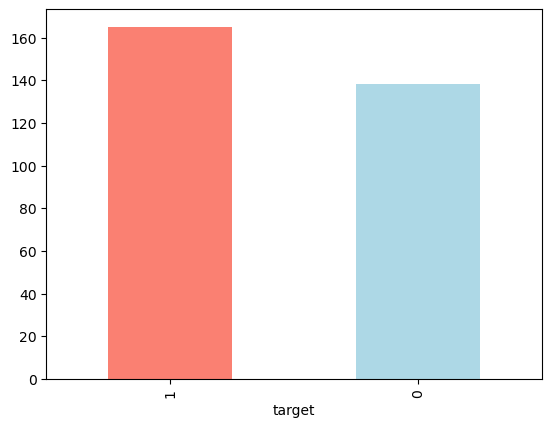

In [10]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# heart disease frequancy according to sex

In [14]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


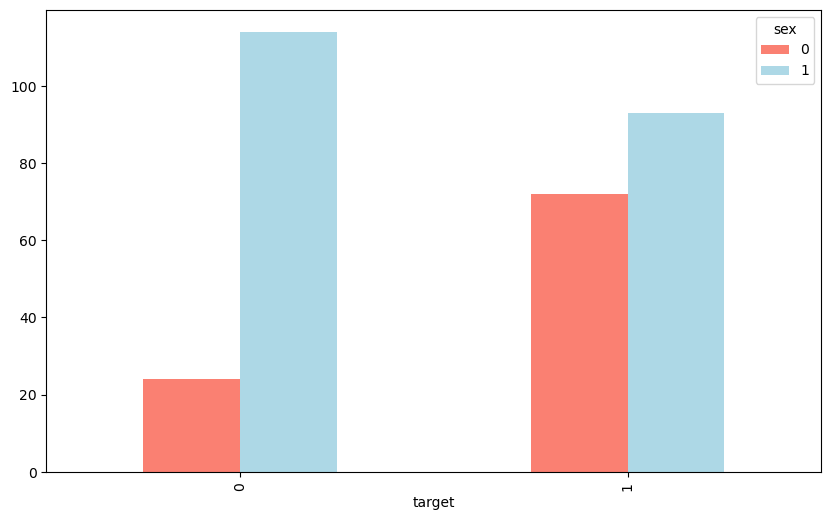

In [16]:
 pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   color=['salmon','lightblue'],
                                   figsize=(10,6));

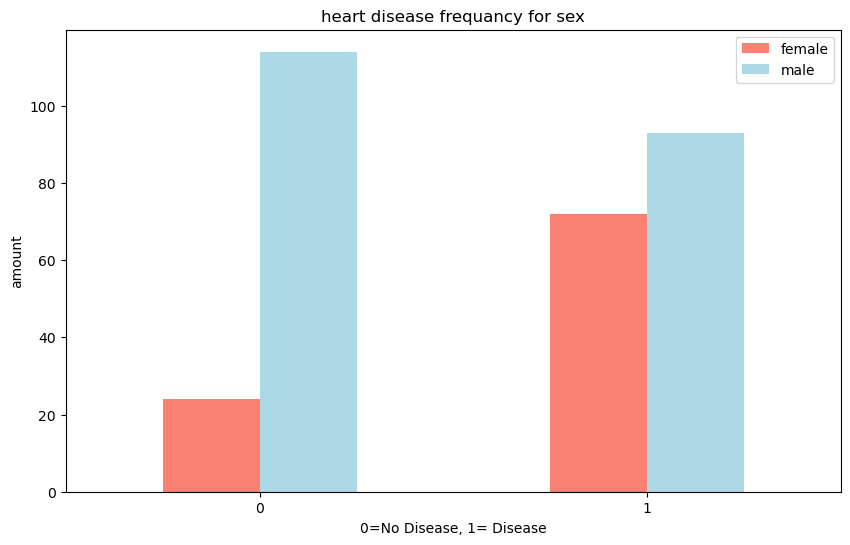

In [17]:
 pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   color=['salmon','lightblue'],
                                   figsize=(10,6))
plt.title('heart disease frequancy for sex')
plt.xlabel('0=No Disease, 1= Disease')
plt.legend(['female','male'])
plt.ylabel('amount')
plt.xticks(rotation=0);

In [18]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

# age vs max heart rate for heart disease

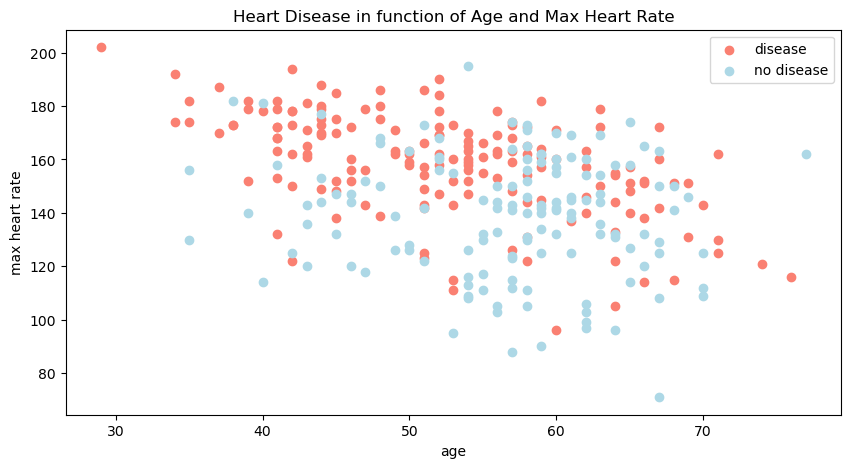

In [19]:
plt.figure(figsize=(10,5))

# scatter with postive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')
# scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')
# add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease','no disease']);

<Axes: ylabel='Frequency'>

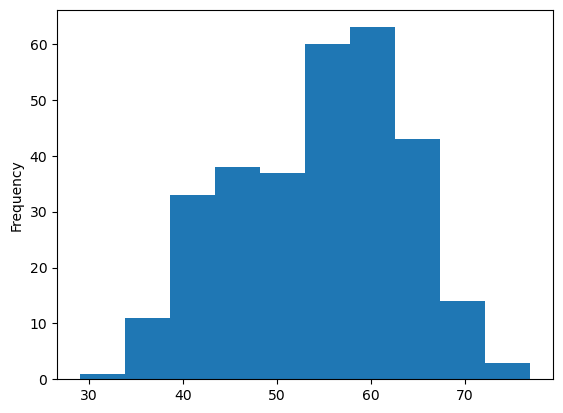

In [20]:
df.age.plot.hist()


# Heart Disease Frequency per Chest Pain Type

   3. cp - chest pain type
      *  0: Typical angina: chest pain related decrease blood supply to the heart
      *  1: Atypical angina: chest pain not related to heart
      *  2: Non-anginal pain: typically esophageal spasms (non heart related)
      *  3: Asymptomatic: chest pain not showing signs of disease



In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


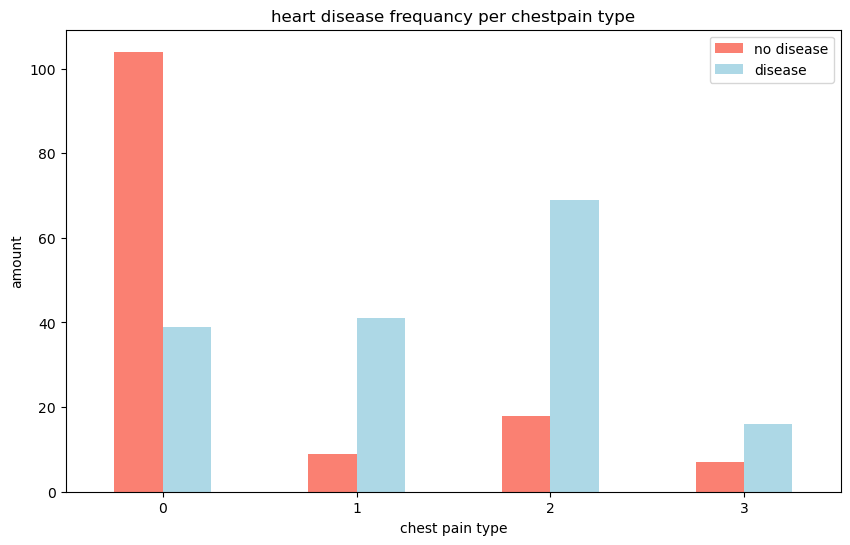

In [22]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 color=['salmon','lightblue'],
                                 figsize=(10,6))
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0)
plt.title('heart disease frequancy per chestpain type');


In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

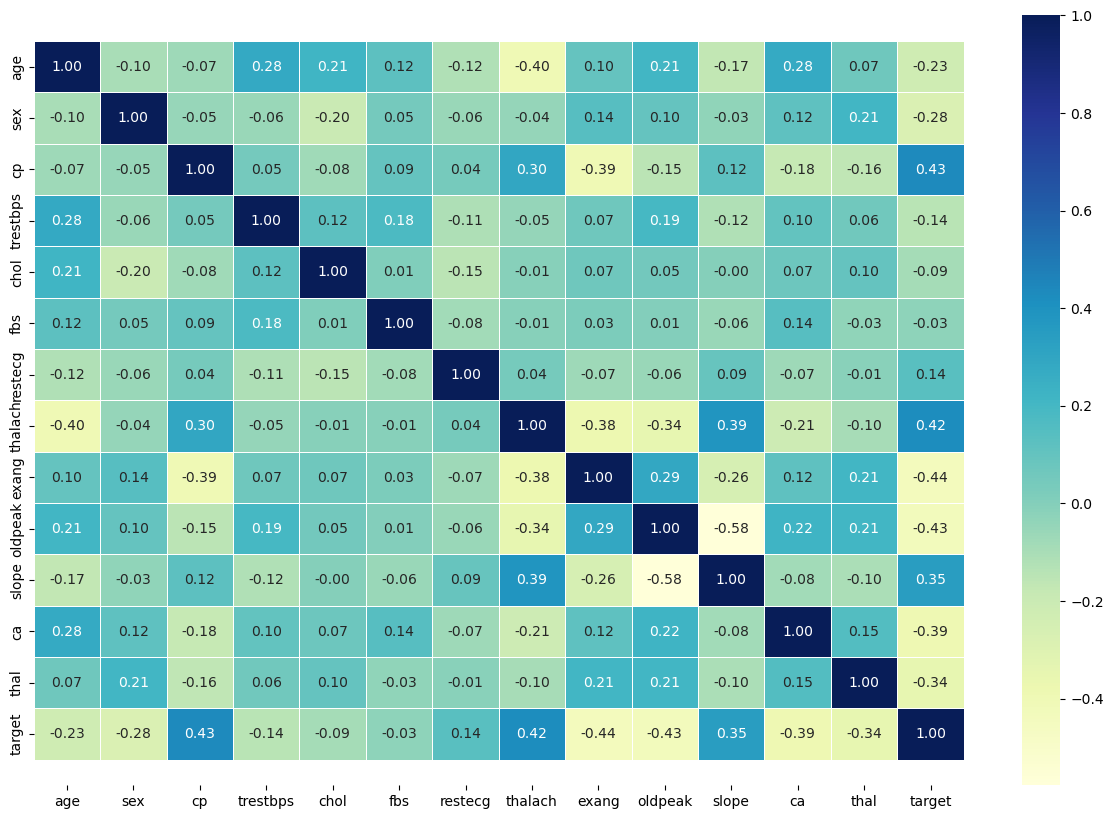

In [25]:
#let's make our correlatiom matrix a little pretier
corr_matrix=df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt ='.2f',
                cmap='YlGnBu');
bottom ,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top - 0.5)

# 5.modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
# split data to x and y
x = df.drop('target',axis=1)
y = df['target']


In [28]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
#split data into train and test set
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [32]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

**Now we've got our data split into training and test sets, it's time to build a machine learning model.**

**We'll train it (find the patterns) on the training set.**

**And we'll test it (use the patterns) on the test set.**

**We're going to try 3 different machine learning models:**

   1. Logistic Regression
   2. K-Nearest Neighbours Classifier
   3. Random Forest Classifie

In [33]:
# put models in dictionary
models = {'Logestic Regression': LogisticRegression(),
         'knn': KNeighborsClassifier(),
         'Random forest': RandomForestClassifier()}
# create function to fit and score data
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fit and evaluate machine learning model
    models: dictionary if different scikit-learn models
    x_train:training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop thrugh models
    for name , model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # evaluate the model and append it's score to model_score
        model_scores[name]= model.score(x_test,y_test)
    return model_scores    

In [34]:
model_scores = fit_and_score(models=models,
                            x_train = x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

c:\Users\mosta\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

# model comparison

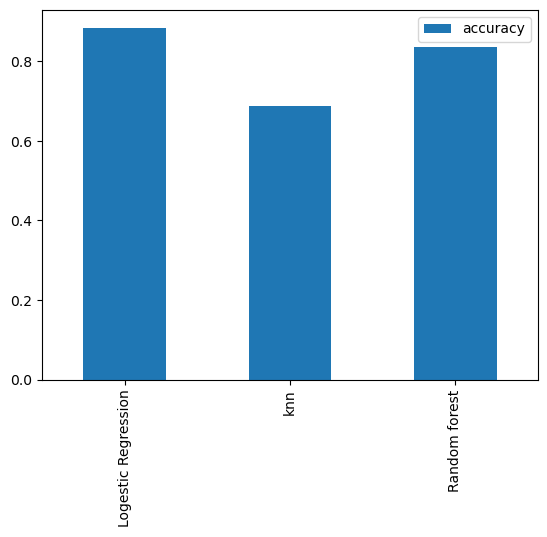

In [35]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

**Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?Let's look at the following:**

  *  Hypyterparameter tuning
  *  Feature importance
  *  Confusion matrix
  *  Cross-validation
  *  Precision
  *  Recall
  *  F1 score
  *  Classification report
  *  ROC curve
  *  Area under the curve (AUC)


# Hyperparameter tuning (by hand)

In [36]:
# let's tune knn
train_scores = []
test_scores = []
# create alistofdiffrent values for n-nighbours
neighbors = range(1,21)
# set knn instance
knn = KNeighborsClassifier()
# loop through diffrent neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # fit the algorithm
    knn.fit(x_train,y_train)
    # update training score list
    train_scores.append(knn.score(x_train,y_train))
    # update testing score list
    test_scores.append(knn.score(x_test,y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


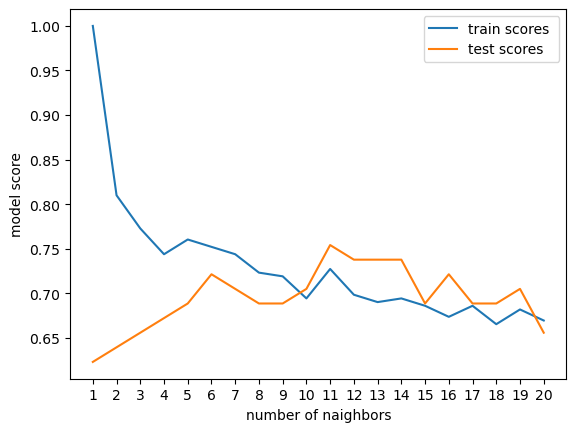

In [39]:
plt.plot(neighbors,train_scores,label='train scores ')
plt.plot(neighbors,test_scores,label='test scores ')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('number of naighbors')
plt.ylabel('model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

    * LogisticRegression()
    * RandomForestClassifier()

... using RandomizedSearchCV


In [40]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid= {'n_estimators': np.arange(10,1000,50),
         'max_depth':[None,3,5,10],
         'min_samples_split': np.arange(2,20,2),
         'min_samples_leaf': np.arange(1,20,2)}



Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...


In [41]:
# tune logestic regression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442



Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...


In [44]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [47]:
log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442


# Evaluting our tuned machine learning classifier, beyond accuracy

   * ROC curve and AUC score
   * Confusion matrix
   * Classification report
   * Precision
   * Recall
   * F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.


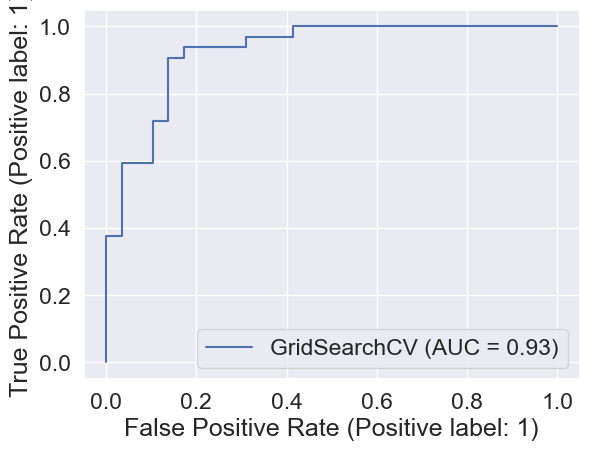

In [61]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=x_test, 
                               y=y_test); 

In [59]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


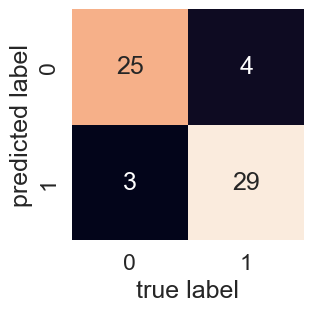

In [60]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
plot_conf_mat(y_test,y_preds)



**Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.**


In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [64]:
# check best hyperprameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
# create a new classifier with best parameter
clf = LogisticRegression(C = 0.20433597178569418,
                        solver= 'liblinear')
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [76]:
# Cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring= 'accuracy'))
cv_acc

0.8446994535519124

In [75]:
# Cross-validated precision
cv_precision = np.mean(cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring= 'precision'))
cv_precision

0.8207936507936507

In [74]:
# Cross-validated recall
cv_recall = np.mean(cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring= 'recall'))
cv_recall

0.9212121212121213

In [73]:
# Cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring= 'f1'))
cv_f1

0.8673007976269721

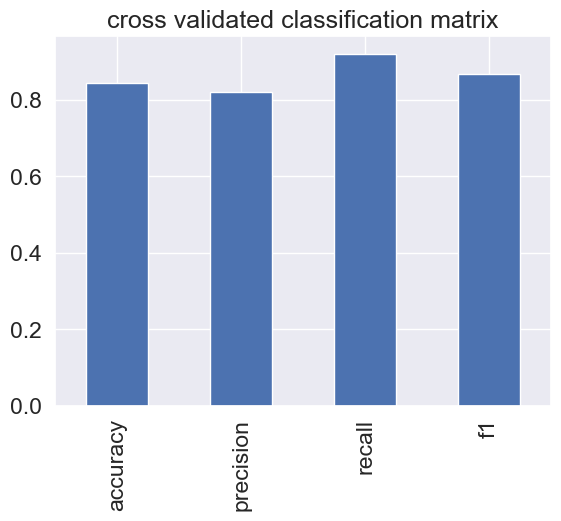

In [80]:
# visualize our cross-validated matrix
cv_metrics = pd.DataFrame({'accuracy': cv_acc,
                          'precision': cv_precision,
                          'recall': cv_recall,
                          'f1': cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title = 'cross validated classification matrix',
                     legend = False);


# Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...


In [83]:
gs_log_reg.best_params_
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [84]:
# check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [86]:
# math coef's of fetueres to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

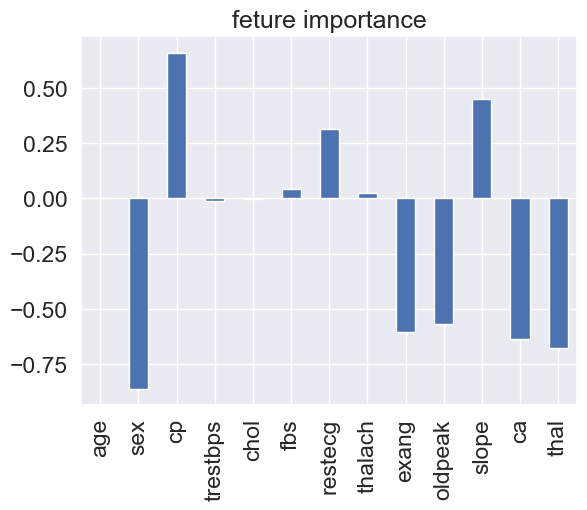

In [90]:
#visualize feture importance

feature_df =pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='feture importance',legend=False);

In [91]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [92]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107




**slope - the slope of the peak exercise ST segment**

*    0: Upsloping: better heart rate with excercise (uncommon)
*    1: Flatsloping: minimal change (typical healthy heart)
*    2: Downslopins: signs of unhealthy heart




# 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

  *  Could you collect more data?
  *  Could you try a better model? Like CatBoost or XGBoost?
  *  Could you improve the current models? (beyond what we've done so far)
  *  If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?



# catboost

In [95]:
pip install catboost

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.2/101.0 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.4/101.0 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.6/101.0 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.8/101.0 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 1.0/101.0 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.1/101.0 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.3/101.0 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.4/101.0 MB 3.4 MB/s eta 0:0

In [102]:
from catboost import CatBoostClassifier
model = CatBoostRegressor(iterations=1000,
                           devices='0:1')
# Fit model
model.fit(x_train, y_train)
# Get predictions
y_preds_CB = model.predict(x_test)

Learning rate set to 0.032721
0:	learn: 0.4904152	total: 5.27ms	remaining: 5.27s
1:	learn: 0.4842983	total: 9.1ms	remaining: 4.54s
2:	learn: 0.4779039	total: 13.2ms	remaining: 4.38s
3:	learn: 0.4725125	total: 17.2ms	remaining: 4.29s
4:	learn: 0.4660907	total: 21.5ms	remaining: 4.27s
5:	learn: 0.4603697	total: 25.2ms	remaining: 4.18s
6:	learn: 0.4547232	total: 29.3ms	remaining: 4.15s
7:	learn: 0.4500538	total: 33.6ms	remaining: 4.17s
8:	learn: 0.4459381	total: 38ms	remaining: 4.18s
9:	learn: 0.4418588	total: 42.4ms	remaining: 4.2s
10:	learn: 0.4370353	total: 46.4ms	remaining: 4.17s
11:	learn: 0.4331243	total: 50.3ms	remaining: 4.14s
12:	learn: 0.4289567	total: 53.7ms	remaining: 4.08s
13:	learn: 0.4244765	total: 57.4ms	remaining: 4.04s
14:	learn: 0.4200975	total: 61.5ms	remaining: 4.04s
15:	learn: 0.4161790	total: 65.7ms	remaining: 4.04s
16:	learn: 0.4111574	total: 69.9ms	remaining: 4.04s
17:	learn: 0.4071137	total: 73.7ms	remaining: 4.02s
18:	learn: 0.4036347	total: 77.3ms	remaining: 3.

182:	learn: 0.2030868	total: 730ms	remaining: 3.26s
183:	learn: 0.2025608	total: 735ms	remaining: 3.26s
184:	learn: 0.2022849	total: 739ms	remaining: 3.25s
185:	learn: 0.2018246	total: 743ms	remaining: 3.25s
186:	learn: 0.2013179	total: 746ms	remaining: 3.24s
187:	learn: 0.2006585	total: 750ms	remaining: 3.24s
188:	learn: 0.2004028	total: 754ms	remaining: 3.23s
189:	learn: 0.1995352	total: 757ms	remaining: 3.23s
190:	learn: 0.1994811	total: 759ms	remaining: 3.21s
191:	learn: 0.1990574	total: 763ms	remaining: 3.21s
192:	learn: 0.1984312	total: 767ms	remaining: 3.21s
193:	learn: 0.1978039	total: 771ms	remaining: 3.2s
194:	learn: 0.1967409	total: 774ms	remaining: 3.2s
195:	learn: 0.1963491	total: 779ms	remaining: 3.19s
196:	learn: 0.1960638	total: 783ms	remaining: 3.19s
197:	learn: 0.1953330	total: 787ms	remaining: 3.19s
198:	learn: 0.1946642	total: 791ms	remaining: 3.18s
199:	learn: 0.1939984	total: 795ms	remaining: 3.18s
200:	learn: 0.1936931	total: 800ms	remaining: 3.18s
201:	learn: 0.

370:	learn: 0.1311854	total: 1.5s	remaining: 2.54s
371:	learn: 0.1311185	total: 1.5s	remaining: 2.53s
372:	learn: 0.1308278	total: 1.5s	remaining: 2.53s
373:	learn: 0.1306045	total: 1.51s	remaining: 2.53s
374:	learn: 0.1304271	total: 1.51s	remaining: 2.52s
375:	learn: 0.1302427	total: 1.52s	remaining: 2.52s
376:	learn: 0.1301741	total: 1.52s	remaining: 2.51s
377:	learn: 0.1299484	total: 1.52s	remaining: 2.51s
378:	learn: 0.1296571	total: 1.53s	remaining: 2.51s
379:	learn: 0.1293876	total: 1.53s	remaining: 2.5s
380:	learn: 0.1289940	total: 1.54s	remaining: 2.5s
381:	learn: 0.1287398	total: 1.54s	remaining: 2.49s
382:	learn: 0.1284193	total: 1.55s	remaining: 2.49s
383:	learn: 0.1281934	total: 1.55s	remaining: 2.49s
384:	learn: 0.1276778	total: 1.55s	remaining: 2.48s
385:	learn: 0.1274728	total: 1.56s	remaining: 2.48s
386:	learn: 0.1272352	total: 1.56s	remaining: 2.48s
387:	learn: 0.1269349	total: 1.57s	remaining: 2.47s
388:	learn: 0.1266225	total: 1.57s	remaining: 2.47s
389:	learn: 0.126

554:	learn: 0.0896352	total: 2.25s	remaining: 1.8s
555:	learn: 0.0895619	total: 2.25s	remaining: 1.8s
556:	learn: 0.0892308	total: 2.26s	remaining: 1.8s
557:	learn: 0.0890556	total: 2.26s	remaining: 1.79s
558:	learn: 0.0890460	total: 2.27s	remaining: 1.79s
559:	learn: 0.0889622	total: 2.27s	remaining: 1.78s
560:	learn: 0.0888389	total: 2.27s	remaining: 1.78s
561:	learn: 0.0885697	total: 2.28s	remaining: 1.78s
562:	learn: 0.0882773	total: 2.28s	remaining: 1.77s
563:	learn: 0.0881647	total: 2.29s	remaining: 1.77s
564:	learn: 0.0880389	total: 2.29s	remaining: 1.76s
565:	learn: 0.0879304	total: 2.29s	remaining: 1.76s
566:	learn: 0.0878109	total: 2.3s	remaining: 1.76s
567:	learn: 0.0875867	total: 2.3s	remaining: 1.75s
568:	learn: 0.0872833	total: 2.31s	remaining: 1.75s
569:	learn: 0.0870606	total: 2.31s	remaining: 1.74s
570:	learn: 0.0867990	total: 2.31s	remaining: 1.74s
571:	learn: 0.0866876	total: 2.32s	remaining: 1.74s
572:	learn: 0.0864985	total: 2.32s	remaining: 1.73s
573:	learn: 0.086

740:	learn: 0.0623018	total: 3s	remaining: 1.05s
741:	learn: 0.0621437	total: 3s	remaining: 1.04s
742:	learn: 0.0620477	total: 3.01s	remaining: 1.04s
743:	learn: 0.0619254	total: 3.01s	remaining: 1.04s
744:	learn: 0.0617985	total: 3.02s	remaining: 1.03s
745:	learn: 0.0617637	total: 3.02s	remaining: 1.03s
746:	learn: 0.0617006	total: 3.02s	remaining: 1.02s
747:	learn: 0.0616326	total: 3.03s	remaining: 1.02s
748:	learn: 0.0615505	total: 3.03s	remaining: 1.01s
749:	learn: 0.0614050	total: 3.04s	remaining: 1.01s
750:	learn: 0.0612428	total: 3.04s	remaining: 1.01s
751:	learn: 0.0610823	total: 3.04s	remaining: 1s
752:	learn: 0.0609231	total: 3.05s	remaining: 1s
753:	learn: 0.0607998	total: 3.05s	remaining: 996ms
754:	learn: 0.0606842	total: 3.06s	remaining: 992ms
755:	learn: 0.0605959	total: 3.06s	remaining: 989ms
756:	learn: 0.0604871	total: 3.07s	remaining: 985ms
757:	learn: 0.0603121	total: 3.07s	remaining: 981ms
758:	learn: 0.0601528	total: 3.08s	remaining: 977ms
759:	learn: 0.0599784	to

926:	learn: 0.0454324	total: 3.75s	remaining: 295ms
927:	learn: 0.0452741	total: 3.75s	remaining: 291ms
928:	learn: 0.0451885	total: 3.76s	remaining: 287ms
929:	learn: 0.0450890	total: 3.76s	remaining: 283ms
930:	learn: 0.0450298	total: 3.77s	remaining: 279ms
931:	learn: 0.0449830	total: 3.77s	remaining: 275ms
932:	learn: 0.0449676	total: 3.77s	remaining: 271ms
933:	learn: 0.0449071	total: 3.78s	remaining: 267ms
934:	learn: 0.0448288	total: 3.78s	remaining: 263ms
935:	learn: 0.0447387	total: 3.79s	remaining: 259ms
936:	learn: 0.0446241	total: 3.79s	remaining: 255ms
937:	learn: 0.0446014	total: 3.79s	remaining: 251ms
938:	learn: 0.0445608	total: 3.8s	remaining: 247ms
939:	learn: 0.0444886	total: 3.8s	remaining: 243ms
940:	learn: 0.0443818	total: 3.81s	remaining: 239ms
941:	learn: 0.0442789	total: 3.81s	remaining: 235ms
942:	learn: 0.0442138	total: 3.81s	remaining: 231ms
943:	learn: 0.0441460	total: 3.82s	remaining: 226ms
944:	learn: 0.0440999	total: 3.82s	remaining: 222ms
945:	learn: 0.

In [105]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a CatBoostClassifier
model = CatBoostClassifier(iterations=1000, devices='0:1');

# Fit the model
model.fit(x_train, y_train);

# Get predicted class probabilities for the positive class (1)
y_probs_CB = model.predict_proba(x_test)[:, 1]

# Convert predicted probabilities to binary class labels (0 or 1)
y_preds_CB = (y_probs_CB > 0.5).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_preds_CB)
precision = precision_score(y_test, y_preds_CB)
recall = recall_score(y_test, y_preds_CB)
f1 = f1_score(y_test, y_preds_CB)
roc_auc = roc_auc_score(y_test, y_probs_CB)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Learning rate set to 0.005621
0:	learn: 0.6884219	total: 8.98ms	remaining: 8.97s
1:	learn: 0.6846994	total: 17.1ms	remaining: 8.51s
2:	learn: 0.6804470	total: 24.3ms	remaining: 8.06s
3:	learn: 0.6762242	total: 32.3ms	remaining: 8.05s
4:	learn: 0.6716784	total: 40.6ms	remaining: 8.07s
5:	learn: 0.6672808	total: 48.4ms	remaining: 8.02s
6:	learn: 0.6639958	total: 56.1ms	remaining: 7.96s
7:	learn: 0.6601980	total: 64.4ms	remaining: 7.99s
8:	learn: 0.6563766	total: 73.1ms	remaining: 8.05s
9:	learn: 0.6525103	total: 81.2ms	remaining: 8.04s
10:	learn: 0.6483670	total: 89.3ms	remaining: 8.03s
11:	learn: 0.6448827	total: 97.9ms	remaining: 8.06s
12:	learn: 0.6412767	total: 106ms	remaining: 8.06s
13:	learn: 0.6374286	total: 114ms	remaining: 8.04s
14:	learn: 0.6335427	total: 122ms	remaining: 8s
15:	learn: 0.6288052	total: 129ms	remaining: 7.95s
16:	learn: 0.6250489	total: 137ms	remaining: 7.94s
17:	learn: 0.6209495	total: 145ms	remaining: 7.92s
18:	learn: 0.6181899	total: 153ms	remaining: 7.89s
19

179:	learn: 0.3401759	total: 1.4s	remaining: 6.39s
180:	learn: 0.3397173	total: 1.41s	remaining: 6.39s
181:	learn: 0.3388977	total: 1.42s	remaining: 6.37s
182:	learn: 0.3379224	total: 1.43s	remaining: 6.36s
183:	learn: 0.3371813	total: 1.43s	remaining: 6.35s
184:	learn: 0.3368890	total: 1.44s	remaining: 6.33s
185:	learn: 0.3357595	total: 1.45s	remaining: 6.33s
186:	learn: 0.3350316	total: 1.45s	remaining: 6.32s
187:	learn: 0.3339623	total: 1.46s	remaining: 6.32s
188:	learn: 0.3333955	total: 1.47s	remaining: 6.31s
189:	learn: 0.3321844	total: 1.48s	remaining: 6.3s
190:	learn: 0.3318179	total: 1.48s	remaining: 6.29s
191:	learn: 0.3310974	total: 1.49s	remaining: 6.28s
192:	learn: 0.3300926	total: 1.5s	remaining: 6.27s
193:	learn: 0.3293827	total: 1.51s	remaining: 6.27s
194:	learn: 0.3287322	total: 1.52s	remaining: 6.26s
195:	learn: 0.3276139	total: 1.52s	remaining: 6.26s
196:	learn: 0.3268063	total: 1.53s	remaining: 6.25s
197:	learn: 0.3259827	total: 1.54s	remaining: 6.25s
198:	learn: 0.3

343:	learn: 0.2432819	total: 2.79s	remaining: 5.33s
344:	learn: 0.2427989	total: 2.81s	remaining: 5.33s
345:	learn: 0.2420940	total: 2.81s	remaining: 5.32s
346:	learn: 0.2416286	total: 2.83s	remaining: 5.32s
347:	learn: 0.2413824	total: 2.83s	remaining: 5.31s
348:	learn: 0.2410783	total: 2.84s	remaining: 5.3s
349:	learn: 0.2406212	total: 2.85s	remaining: 5.3s
350:	learn: 0.2403829	total: 2.86s	remaining: 5.29s
351:	learn: 0.2396747	total: 2.87s	remaining: 5.28s
352:	learn: 0.2394747	total: 2.88s	remaining: 5.28s
353:	learn: 0.2390715	total: 2.89s	remaining: 5.27s
354:	learn: 0.2388158	total: 2.9s	remaining: 5.26s
355:	learn: 0.2382697	total: 2.9s	remaining: 5.25s
356:	learn: 0.2379337	total: 2.91s	remaining: 5.24s
357:	learn: 0.2377239	total: 2.92s	remaining: 5.23s
358:	learn: 0.2371700	total: 2.93s	remaining: 5.23s
359:	learn: 0.2367061	total: 2.94s	remaining: 5.22s
360:	learn: 0.2363905	total: 2.94s	remaining: 5.21s
361:	learn: 0.2360850	total: 2.95s	remaining: 5.2s
362:	learn: 0.235

509:	learn: 0.1912839	total: 4.18s	remaining: 4.01s
510:	learn: 0.1911050	total: 4.18s	remaining: 4s
511:	learn: 0.1907812	total: 4.19s	remaining: 4s
512:	learn: 0.1907129	total: 4.2s	remaining: 3.99s
513:	learn: 0.1904574	total: 4.21s	remaining: 3.98s
514:	learn: 0.1900422	total: 4.21s	remaining: 3.97s
515:	learn: 0.1898838	total: 4.22s	remaining: 3.96s
516:	learn: 0.1896718	total: 4.23s	remaining: 3.95s
517:	learn: 0.1894975	total: 4.24s	remaining: 3.94s
518:	learn: 0.1891323	total: 4.25s	remaining: 3.94s
519:	learn: 0.1888891	total: 4.25s	remaining: 3.93s
520:	learn: 0.1886605	total: 4.26s	remaining: 3.92s
521:	learn: 0.1882819	total: 4.27s	remaining: 3.91s
522:	learn: 0.1879103	total: 4.28s	remaining: 3.9s
523:	learn: 0.1876983	total: 4.29s	remaining: 3.89s
524:	learn: 0.1873621	total: 4.29s	remaining: 3.89s
525:	learn: 0.1872114	total: 4.3s	remaining: 3.88s
526:	learn: 0.1869436	total: 4.31s	remaining: 3.87s
527:	learn: 0.1867206	total: 4.32s	remaining: 3.86s
528:	learn: 0.1864837

683:	learn: 0.1525751	total: 5.59s	remaining: 2.58s
684:	learn: 0.1523523	total: 5.6s	remaining: 2.57s
685:	learn: 0.1520159	total: 5.61s	remaining: 2.57s
686:	learn: 0.1516476	total: 5.61s	remaining: 2.56s
687:	learn: 0.1514887	total: 5.62s	remaining: 2.55s
688:	learn: 0.1512333	total: 5.63s	remaining: 2.54s
689:	learn: 0.1510675	total: 5.64s	remaining: 2.53s
690:	learn: 0.1509699	total: 5.65s	remaining: 2.52s
691:	learn: 0.1507375	total: 5.66s	remaining: 2.52s
692:	learn: 0.1506512	total: 5.66s	remaining: 2.51s
693:	learn: 0.1504299	total: 5.67s	remaining: 2.5s
694:	learn: 0.1502647	total: 5.68s	remaining: 2.49s
695:	learn: 0.1500966	total: 5.69s	remaining: 2.48s
696:	learn: 0.1498462	total: 5.7s	remaining: 2.48s
697:	learn: 0.1496598	total: 5.7s	remaining: 2.47s
698:	learn: 0.1494506	total: 5.71s	remaining: 2.46s
699:	learn: 0.1494411	total: 5.72s	remaining: 2.45s
700:	learn: 0.1493661	total: 5.72s	remaining: 2.44s
701:	learn: 0.1491756	total: 5.73s	remaining: 2.43s
702:	learn: 0.14

855:	learn: 0.1241821	total: 6.96s	remaining: 1.17s
856:	learn: 0.1240366	total: 6.97s	remaining: 1.16s
857:	learn: 0.1238676	total: 6.97s	remaining: 1.15s
858:	learn: 0.1237400	total: 6.98s	remaining: 1.15s
859:	learn: 0.1235778	total: 6.99s	remaining: 1.14s
860:	learn: 0.1234006	total: 7s	remaining: 1.13s
861:	learn: 0.1231671	total: 7.01s	remaining: 1.12s
862:	learn: 0.1229332	total: 7.01s	remaining: 1.11s
863:	learn: 0.1227329	total: 7.02s	remaining: 1.1s
864:	learn: 0.1226497	total: 7.03s	remaining: 1.1s
865:	learn: 0.1223937	total: 7.04s	remaining: 1.09s
866:	learn: 0.1222421	total: 7.05s	remaining: 1.08s
867:	learn: 0.1220761	total: 7.05s	remaining: 1.07s
868:	learn: 0.1219545	total: 7.06s	remaining: 1.06s
869:	learn: 0.1217851	total: 7.07s	remaining: 1.06s
870:	learn: 0.1215689	total: 7.08s	remaining: 1.05s
871:	learn: 0.1214961	total: 7.09s	remaining: 1.04s
872:	learn: 0.1213314	total: 7.09s	remaining: 1.03s
873:	learn: 0.1211686	total: 7.1s	remaining: 1.02s
874:	learn: 0.1210

In [106]:
pip install xgboost

   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.1/99.7 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.2/99.7 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.3/99.7 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.5/99.7 MB 2.2 MB/s eta 0:00:47
   ---------------------------------------- 0.6/99.7 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.8/99.7 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 1.0/99.7 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.2/99.7 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.4/99.7 MB 3.1 MB/s eta 0:00:32
    --------------------------------------- 1.6/99.7 MB 3.2 MB/s eta 0:00:31
    --------------------------------------- 1.7/99.7 MB 3.2 MB/s eta 0:00:31
    --

In [107]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
XGB = clf.fit(x_train,y_train)
prediction = XGB.predict(x_test)

In [109]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [110]:
print(confusion_matrix(y_test, prediction))

[[25  4]
 [ 7 25]]


In [115]:
y_probs_CB = model.predict_proba(x_test)[:, 1]

In [116]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, y_probs_CB)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.82
Precision: 0.86
Recall: 0.78
F1 Score: 0.82
ROC AUC: 0.92
